In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')

# Fix the file path below to the correct location of your CSV file
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Data use/customer_dataset_800.csv')
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,CustomerID,Age,Gender,AnnualIncome,SpendingScore,Savings,YearsWithCompany,ProductCategory,WebsiteVisitsPerMonth,PurchasedLastMonth
0,100000,18,Male,46992,15,25413,6,Electronics,10,1
1,100001,25,Male,65376,49,14815,2,Electronics,10,0
2,100002,61,Male,76590,67,11545,9,Home,14,1
3,100003,55,Male,63476,45,14523,7,Electronics,19,1
4,100004,18,Male,57234,27,13643,5,Fashion,9,1


In [ ]:
df.tail()

,CustomerID,Age,Gender,AnnualIncome,SpendingScore,Savings,YearsWithCompany,ProductCategory,WebsiteVisitsPerMonth,PurchasedLastMonth
795,100795,28,Female,34925,95,22443,7,Electronics,12,1
796,100796,39,Other,52196,48,4844,8,Electronics,14,1
797,100797,19,Female,49320,7,20877,5,Fashion,11,1
798,100798,46,Female,38486,88,18308,2,Beauty,15,1
799,100799,32,Male,45896,7,12714,8,Fashion,10,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CustomerID             800 non-null    int64 
 1   Age                    800 non-null    int64 
 2   Gender                 800 non-null    object
 3   AnnualIncome           800 non-null    int64 
 4   SpendingScore          800 non-null    int64 
 5   Savings                800 non-null    int64 
 6   YearsWithCompany       800 non-null    int64 
 7   ProductCategory        800 non-null    object
 8   WebsiteVisitsPerMonth  800 non-null    int64 
 9   PurchasedLastMonth     800 non-null    int64 
dtypes: int64(8), object(2)
memory usage: 62.6+ KB


In [ ]:
df.describe()

,CustomerID,Age,AnnualIncome,SpendingScore,Savings,YearsWithCompany,WebsiteVisitsPerMonth,PurchasedLastMonth
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,100399.5000,44.368750,48504.872500,50.998750,15251.092500,4.901250,15.027500,0.688750
std,231.0844,15.196181,15034.991735,28.828851,5022.145111,2.455409,3.747572,0.463294
min,100000.0000,18.000000,-1203.000000,1.000000,1092.000000,1.000000,1.000000,0.000000
25%,100199.7500,31.000000,38495.750000,26.000000,12104.000000,3.000000,12.000000,0.000000
50%,100399.5000,45.000000,48360.000000,50.000000,15317.000000,5.000000,15.000000,1.000000
75%,100599.2500,57.000000,58668.250000,77.000000,18608.750000,7.000000,17.250000,1.000000
max,100799.0000,69.000000,85071.000000,100.000000,28979.000000,9.000000,28.000000,1.000000


In [ ]:
# Checking total no. of null values in columns

df.isnull().sum()

,0
CustomerID,0
Age,0
Gender,0
AnnualIncome,0
SpendingScore,0
Savings,0
YearsWithCompany,0
ProductCategory,0
WebsiteVisitsPerMonth,0
PurchasedLastMonth,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df['Gender'].value_counts()

,count
Gender,
Female,395
Male,366
Other,39


In [ ]:
df['ProductCategory'].value_counts()

,count
ProductCategory,
Electronics,306
Fashion,234
Home,171
Beauty,89


In [ ]:
# One-Hot Encoding for 'Gender' and 'ProductCategory'
df = df.replace({'Gender':{"Male": 0, "Female": 1,"Other":-1}})
df=df.replace({'ProductCategory':{'Electronics':1,'Home':2,'Fashion':3,'Beauty':4}})
df.head(15)

/tmp/ipython-input-200-1895862806.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.replace({'Gender':{"Male": 0, "Female": 1,"Other":-1}})
/tmp/ipython-input-200-1895862806.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df=df.replace({'ProductCategory':{'Electronics':1,'Home':2,'Fashion':3,'Beauty':4}})


,CustomerID,Age,Gender,AnnualIncome,SpendingScore,Savings,YearsWithCompany,ProductCategory,WebsiteVisitsPerMonth,PurchasedLastMonth
0,100000,18,0,46992,15,25413,6,1,10,1
1,100001,25,0,65376,49,14815,2,1,10,0
2,100002,61,0,76590,67,11545,9,2,14,1
3,100003,55,0,63476,45,14523,7,1,19,1
4,100004,18,0,57234,27,13643,5,3,9,1
5,100005,40,0,63660,47,16653,4,3,16,0
6,100006,36,1,80234,42,13625,9,2,20,1
7,100007,55,0,55318,88,4410,5,3,16,0
8,100008,67,0,53080,97,21170,5,3,15,0
9,100009,29,0,48026,18,13541,1,1,18,1


In [ ]:
# Categorize SpendingScore into Spending segment by diving it into range and assign low or high
df["SpendingSegment"] = pd.cut(df["SpendingScore"],bins=[0, 70, 100],labels=["Low", "High"])

# Count segments
print("\nSpending Segment Distribution:\n", df["SpendingSegment"].value_counts())
df


Spending Segment Distribution:
 SpendingSegment
Low     554
High    246
Name: count, dtype: int64


,CustomerID,Age,Gender,AnnualIncome,SpendingScore,Savings,YearsWithCompany,ProductCategory,WebsiteVisitsPerMonth,PurchasedLastMonth,SpendingSegment
0,100000,18,0,46992,15,25413,6,1,10,1,Low
1,100001,25,0,65376,49,14815,2,1,10,0,Low
2,100002,61,0,76590,67,11545,9,2,14,1,Low
3,100003,55,0,63476,45,14523,7,1,19,1,Low
4,100004,18,0,57234,27,13643,5,3,9,1,Low
...,...,...,...,...,...,...,...,...,...,...,...
795,100795,28,1,34925,95,22443,7,1,12,1,High
796,100796,39,-1,52196,48,4844,8,1,14,1,Low
797,100797,19,1,49320,7,20877,5,3,11,1,Low
798,100798,46,1,38486,88,18308,2,4,15,1,High


In [ ]:
df['SpendingSegment'].value_counts()

,count
SpendingSegment,
Low,554
High,246


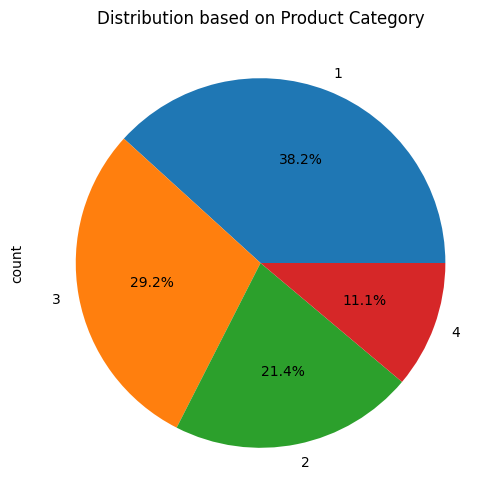

In [ ]:
# Pie chart (Product category)
plt.figure(figsize=(6, 6))
df["ProductCategory"].value_counts().plot.pie(
    autopct="%1.1f%%")
plt.title("Distribution based on Product Category")
plt.show()

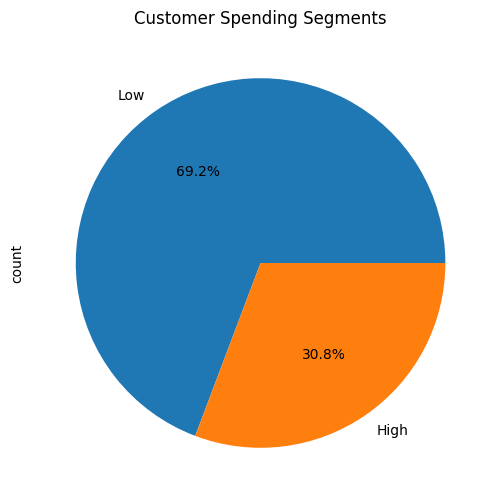

In [ ]:
# Pie Chart (Spending Segments)
plt.figure(figsize=(12, 6))
df["SpendingSegment"].value_counts().plot.pie(
    autopct="%1.1f%%"
)
plt.title("Customer Spending Segments")
plt.show()

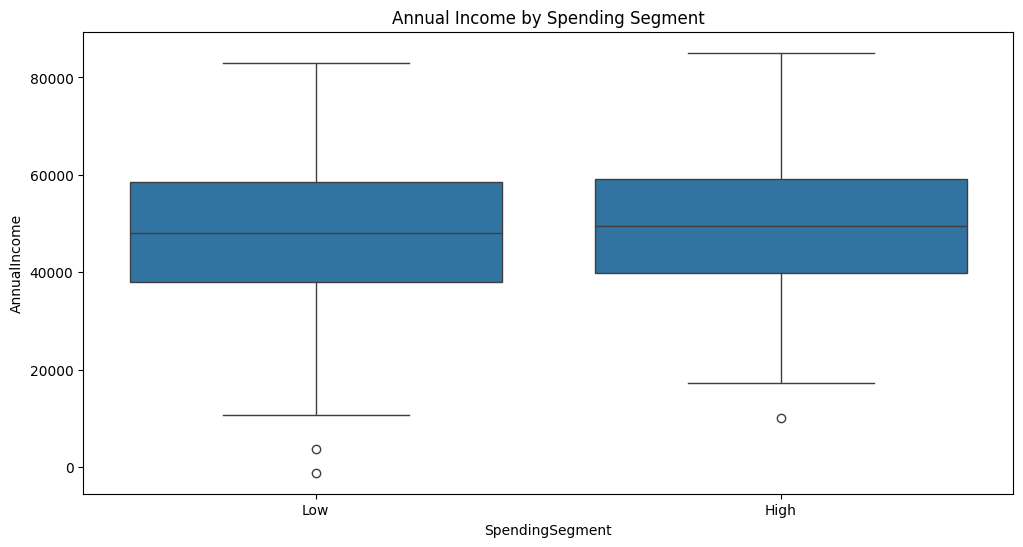

In [ ]:
# Box Plots (Spending segment vs Annual income)
plt.figure(figsize=(12, 6))
sns.boxplot(x="SpendingSegment", y="AnnualIncome", data=df)
plt.title("Annual Income by Spending Segment")
plt.show()

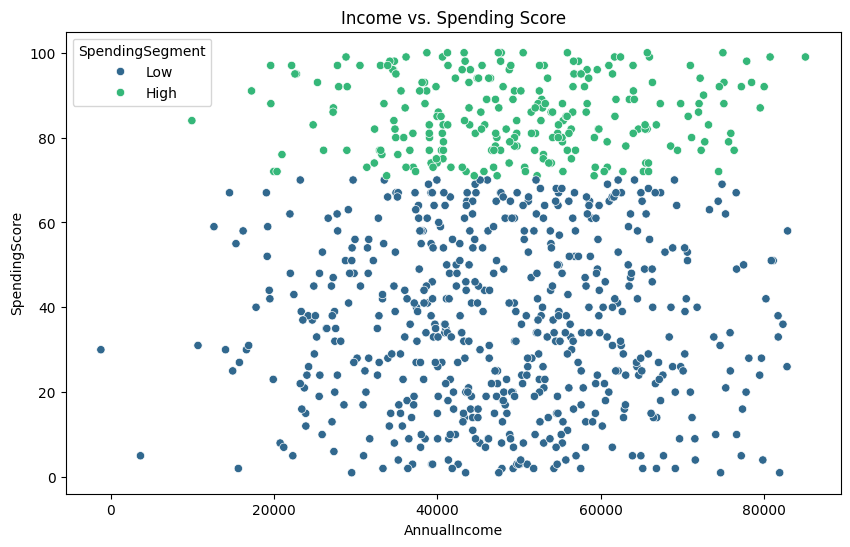

In [ ]:
# Scatter Plot (Income vs. Spending Score)

plt.figure(figsize=(10, 6))
sns.scatterplot(x="AnnualIncome", y="SpendingScore", hue="SpendingSegment", data=df, palette="viridis")
plt.title("Income vs. Spending Score")
plt.show()

/tmp/ipython-input-207-2376790820.py:4: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="SpendingSegment", y="WebsiteVisitsPerMonth", data=df, ci=None)


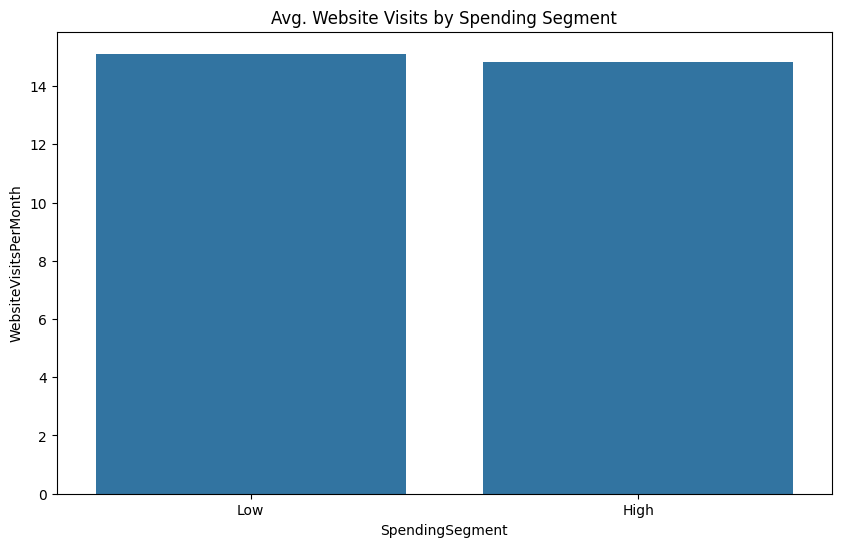

In [ ]:
# Bar Plot (Spending segment vs website visit per month)

plt.figure(figsize=(10, 6))
sns.barplot(x="SpendingSegment", y="WebsiteVisitsPerMonth", data=df, ci=None)
plt.title("Avg. Website Visits by Spending Segment")
plt.show()

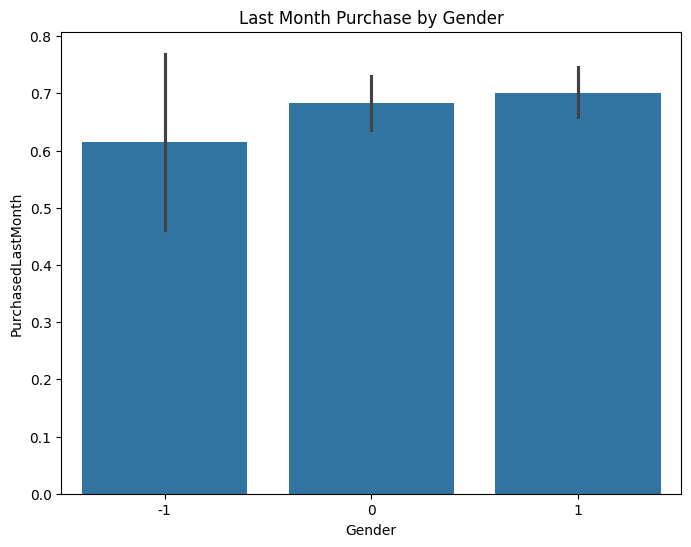

In [ ]:
# BAR PLOT (Gender vs Last Month Purchase)
plt.figure(figsize=(8, 6))
sns.barplot(x="Gender", y="PurchasedLastMonth", data=df)
plt.title("Last Month Purchase by Gender")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

# Remove 'ProductCategory' along with other columns from the feature set
x = df.drop(["CustomerID", "SpendingScore", "SpendingSegment", "ProductCategory"], axis=1)
y = df["SpendingSegment"]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Scale numerical features
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

print("\nData After Scaling:\n", df.head())


Data After Scaling:
    CustomerID  Age  Gender  AnnualIncome  SpendingScore  Savings  \
0      100000   18       0         46992             15    25413   
1      100001   25       0         65376             49    14815   
2      100002   61       0         76590             67    11545   
3      100003   55       0         63476             45    14523   
4      100004   18       0         57234             27    13643   

   YearsWithCompany  ProductCategory  WebsiteVisitsPerMonth  \
0                 6                1                     10   
1                 2                1                     10   
2                 9                2                     14   
3                 7                1                     19   
4                 5                3                      9   

   PurchasedLastMonth SpendingSegment  
0                   1             Low  
1                   0             Low  
2                   1             Low  
3                   1         

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

lr = LogisticRegression(max_iter=10000)
lr.fit(x_train, y_train)
y_pred_lr_train = lr.predict(x_train)
y_pred_lr_test = lr.predict(x_test)

print("Logistic Regression Accuracy for train:", accuracy_score(y_train, y_pred_lr_train))
print("Logistic Regression Accuracy for test:", accuracy_score(y_test, y_pred_lr_test))

print("\nClassification Report for testing:\n", classification_report(y_test, y_pred_lr_test))
print("\nClassification Report for training:\n", classification_report(y_train, y_pred_lr_train))

Logistic Regression Accuracy for train: 0.6767857142857143
Logistic Regression Accuracy for test: 0.7291666666666666

Classification Report for testing:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00        65
         Low       0.73      1.00      0.84       175

    accuracy                           0.73       240
   macro avg       0.36      0.50      0.42       240
weighted avg       0.53      0.73      0.61       240


Classification Report for training:
               precision    recall  f1-score   support

        High       0.00      0.00      0.00       181
         Low       0.68      1.00      0.81       379

    accuracy                           0.68       560
   macro avg       0.34      0.50      0.40       560
weighted avg       0.46      0.68      0.55       560



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/m

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score

dt = DecisionTreeClassifier(criterion='entropy',max_leaf_nodes=16,random_state=0)
dt.fit(x_train, y_train)
y_pred_dt_test = dt.predict(x_test)
y_pred_dt_train = dt.predict(x_train)

print("Decision Tree Accuracy for train:", accuracy_score(y_train, y_pred_dt_train))
print("Decision Tree Accuracy for test:", accuracy_score(y_test, y_pred_dt_test))


print("\nClassification Report for testing:\n", classification_report(y_test, y_pred_dt_test))
print("\nClassification Report for trainig:\n", classification_report(y_train, y_pred_dt_train))

Decision Tree Accuracy for train: 0.7
Decision Tree Accuracy for test: 0.7291666666666666

Classification Report for testing:
               precision    recall  f1-score   support

        High       0.50      0.08      0.13        65
         Low       0.74      0.97      0.84       175

    accuracy                           0.73       240
   macro avg       0.62      0.52      0.49       240
weighted avg       0.67      0.73      0.65       240


Classification Report for trainig:
               precision    recall  f1-score   support

        High       0.88      0.08      0.15       181
         Low       0.69      0.99      0.82       379

    accuracy                           0.70       560
   macro avg       0.79      0.54      0.48       560
weighted avg       0.76      0.70      0.60       560



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='entropy',random_state=50)
rf.fit(x_train, y_train)
y_pred_rf_test = rf.predict(x_test)
y_pred_rf_train = rf.predict(x_train)

print("Random Forest Accuracy for train:", accuracy_score(y_train, y_pred_rf_train))
print("Random Forest Accuracy for test:", accuracy_score(y_test, y_pred_rf_test))

print("\nClassification Report for testing:\n", classification_report(y_test, y_pred_rf_test))
print("\nClassification Report for training:\n", classification_report(y_train, y_pred_rf_train))

Random Forest Accuracy for train: 1.0
Random Forest Accuracy for test: 0.6583333333333333

Classification Report for testing:
               precision    recall  f1-score   support

        High       0.19      0.08      0.11        65
         Low       0.72      0.87      0.79       175

    accuracy                           0.66       240
   macro avg       0.45      0.48      0.45       240
weighted avg       0.57      0.66      0.60       240


Classification Report for training:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00       181
         Low       1.00      1.00      1.00       379

    accuracy                           1.00       560
   macro avg       1.00      1.00      1.00       560
weighted avg       1.00      1.00      1.00       560



In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred_knn_test = knn.predict(x_test)
y_pred_knn_train = knn.predict(x_train)

print("KNN Accuracy for train:", accuracy_score(y_train, y_pred_knn_train))
print("KNN Accuracy for test:", accuracy_score(y_test, y_pred_knn_test))

print("\nClassification Report for testing:\n", classification_report(y_test, y_pred_knn_test))
print("\nClassification Report for training:\n", classification_report(y_train, y_pred_knn_train))

KNN Accuracy for train: 0.7035714285714286
KNN Accuracy for test: 0.6583333333333333

Classification Report for testing:
               precision    recall  f1-score   support

        High       0.32      0.23      0.27        65
         Low       0.74      0.82      0.78       175

    accuracy                           0.66       240
   macro avg       0.53      0.52      0.52       240
weighted avg       0.63      0.66      0.64       240


Classification Report for training:
               precision    recall  f1-score   support

        High       0.58      0.30      0.39       181
         Low       0.73      0.90      0.80       379

    accuracy                           0.70       560
   macro avg       0.65      0.60      0.60       560
weighted avg       0.68      0.70      0.67       560



In [ ]:
models_test = {
    "Logistic Regression": accuracy_score(y_test, y_pred_lr_test),
    "Decision Tree": accuracy_score(y_test, y_pred_dt_test),
    "Random Forest": accuracy_score(y_test, y_pred_rf_test),
    "KNN": accuracy_score(y_test, y_pred_knn_test)
}
models_train={
    "Logistic Regression": accuracy_score(y_train, y_pred_lr_train),
    "Decision Tree": accuracy_score(y_train, y_pred_dt_train),
    "Random Forest": accuracy_score(y_train, y_pred_rf_train),
    "KNN": accuracy_score(y_train, y_pred_knn_train)
}

best_model_test = max(models_test, key=models_test.get)
best_model_train = max(models_train, key=models_train.get)
print("\nBest Model for testing:", best_model_test, "with Accuracy:", models_test[best_model_test])
print("\nBest Model for training:", best_model_train, "with Accuracy:", models_train[best_model_train])


Best Model for testing: Logistic Regression with Accuracy: 0.7291666666666666

Best Model for training: Random Forest with Accuracy: 1.0
